# The Transformation and Accept/Reject (aka. Von Neumann) methods 
Python notebook with exercise on how to generate random numbers following a specific PDF using uniformly distributed random numbers, in this case a third degree polynomial: $f(x) = x^3$, in the interval $[0, C]$ where $C$ is a number that ensures that the function if properly normalized.

Both the Accept-Reject (Von Neumann) and transformation method should be considered for the problem:
- Transformation method (if function can be integrated and then inverted).
- Accept-Reject (or Hit & Miss) method (by Ulam Stanislav and John Von Neumann).

### References:
- G. Cowan: Chapter 3
- P. R. Bevington: page 81-84
- __[40. Monte Carlo Techniques PDG](http://pdg.lbl.gov/2020/reviews/rpp2020-rev-monte-carlo-techniques.pdf)__

### Authors: 
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 29-11-2022 (latest update)

***

In [69]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats
import sympy as sy

Load external functions:

In [70]:
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

set the parameters of the program:

In [108]:
r = np.random
r.seed(42)

save_plots = False  
N_points = 10000      # Number of random points used 

xmin = 1
xmax = 1.0            # Find out yourself what a good interval is.
N_bins = 100          # Find out yourself what a good number of bins is.

# f(x):
def fx_x3(x) :
    k = (xmax - xmin) / N_bins
    N = N_points * k
    return N*x**3

In [109]:
x, C = sy.symbols(['x','C'])
xmax1=sy.solve(sy.integrate(x**3, (x, 1, C))-1,C)[1]
i_analytic = sy.integrate(x**3, (x, 0, x))
print("Analytic integral: ", i_analytic)
print("Upper limit of integration: ", xmax1)

Analytic integral:  x**4/4
Upper limit of integration:  5**(1/4)


In [110]:
xmax=5**(1/4)

$$ F(x) = \frac{x^4}{4} \Rightarrow F(r)^{-1} = \sqrt{2}r^{1/4}$$

In [113]:
x_transformation = np.power((r.uniform(size=N_points)),1/4)*np.sqrt(2)
print("x_transformation: ", (x_transformation))

x_transformation:  [1.10567777 1.07423028 0.91619532 ... 1.04984612 1.1539695  0.91109601]


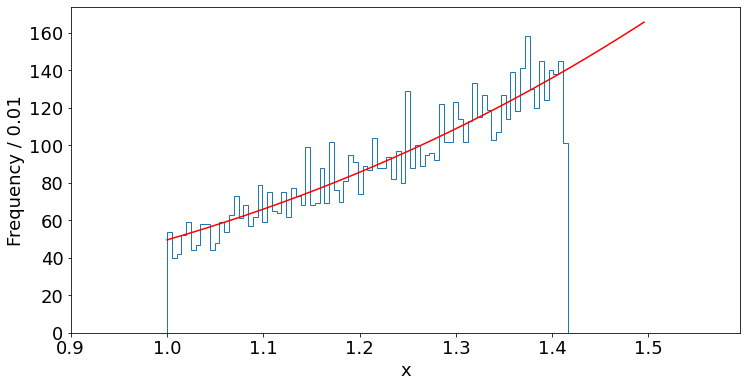

In [114]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x_transformation, bins=N_bins, range=(xmin, xmax), histtype='step', label='Histogram')

x_axis1 = np.linspace(xmin, xmax, 1000)
y_axis1 = fx_x3(x_axis1)
ax.plot(x_axis1, y_axis1, 'r-', label='function (not fitted)')

ax.set(xlabel="x", ylabel="Frequency / 0.01", xlim=(xmin-0.1, xmax+0.1));

In [115]:
# Define the numpy arrays to be filled:

N_try = 0
ymin = 0.0      # Minimum value the function will take!
ymax = xmax**3      # Maximum value the function will take!
x_accepted = np.zeros(N_points)

for i in range(N_points):
    
    while True:
        
        # Count the number of tries, to get efficiency/integral
        N_try += 1                    
        
        # Range that f(x) is defined/wanted in:
        x_test = r.uniform(xmin, xmax)  
        
        # Upper bound for function values:
        y_test = r.uniform(ymin, ymax)
        
        if (y_test <  x_test**3):
            break
            
    x_accepted[i] = x_test



In [116]:
# Efficiency
eff = N_points / N_try                        

# Error on efficiency (binomial!)
eff_error = np.sqrt(eff * (1-eff) / N_try) 

# Integral
integral =  eff * (xmax-xmin) * (ymax-ymin)

# Error on integral
eintegral = eff_error * (xmax-xmin) * (ymax-ymin)  

print(f"\nIntegral of f(x) = x^3, x in [0, 1.41] is: \t {integral:7.4f} +- {eintegral:6.4f}")
print(f"The efficiency of the Accept/Reject method used here is: \t {eff:.2%} +/- {eff_error:.2%}")
# We normalized the function ahead of time, so we should hope to get a result consistent with unity!


Integral of f(x) = x^3, x in [0, 1.41] is: 	  1.0004 +- 0.0063
The efficiency of the Accept/Reject method used here is: 	 60.40% +/- 0.38%


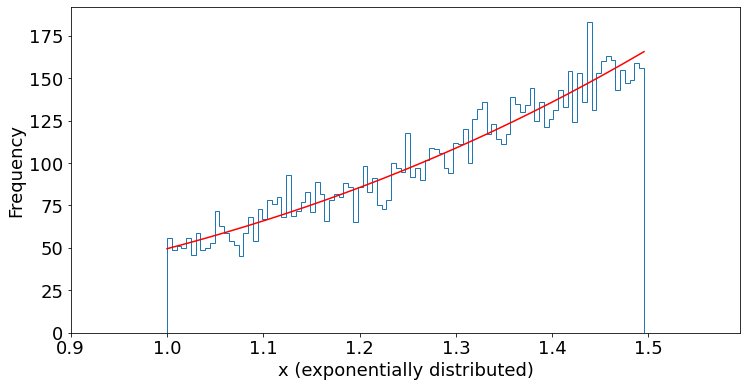

In [117]:
fig2, ax2 = plt.subplots(figsize=(12, 6))
ax2.hist(x_accepted, bins=N_bins, range=(xmin, xmax), histtype='step', label='histogram' )
ax2.plot(x_axis1, y_axis1, 'r-', label='function (not fitted)')
ax2.set(xlabel="x (exponentially distributed)", ylabel="Frequency", xlim=(xmin-0.1, xmax+0.1));

## Problem: 

1) Calculate $C$ such that f(x) is normalised [Analytical problem].

$$1 = \int_{0}^{C} x'^3 dx' \Rightarrow C=4^{1/4} = \sqrt{2} $$

2) Calculate the relevant integral (below) and inverted function for using the transformation method. Check that the limits actually makes sense [Analytical problem]. Note that it is important to include the limits!

$$F(x) = \int_{0}^{x} f(x') dx'$$

3) Produce random points following $f(x) = x^3$, in the interval $[0, C]$ using **both** the Transformation and the Accept/Reject method.

4) Fit your data with a third degree polynomial, and check that the coefficients correspond to what you would expect.

5) Now try to change the interval from [0,C] to [1,C], and see how the limits change.

# Learning points:

As a basic principle, this exercise should make you capable of using two methods for generating random numbers according to a 1D PDF f(x) based on uniform random numbers (provided by a standard algorithm):
1. Transformation method (using integral+inverse of f(x))
2. Accept-Reject method (using sampling in 2D compared to f(x))

You should know:
1. The advantages and limitations of each method.
2. How to get the desired result out of each method.

Finally, you should understand the motivation behind generating random numbers according to a given distribution, namely for simulating complicated situations (e.g. experimental setup), and evaluating the outcome.